In [1]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
import os

# Пути к данным
data_path = 'data/example.csv'
forecast_path = 'forecast.csv'


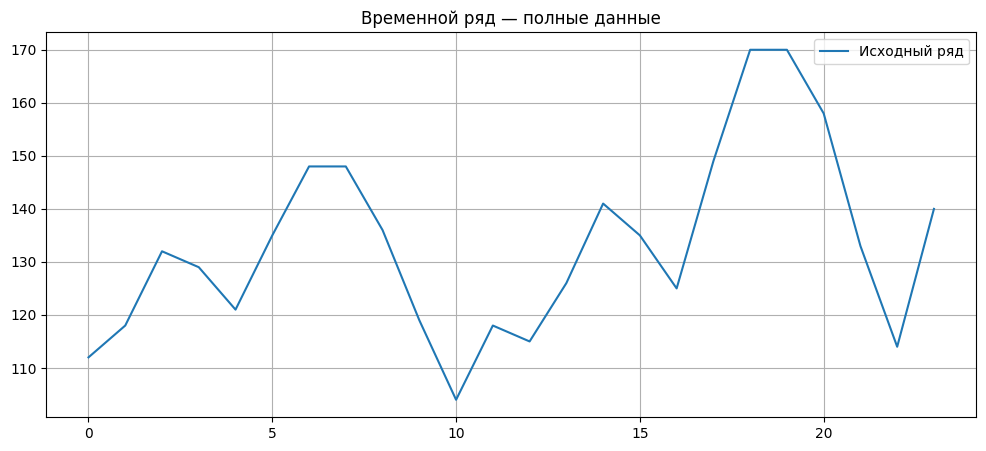

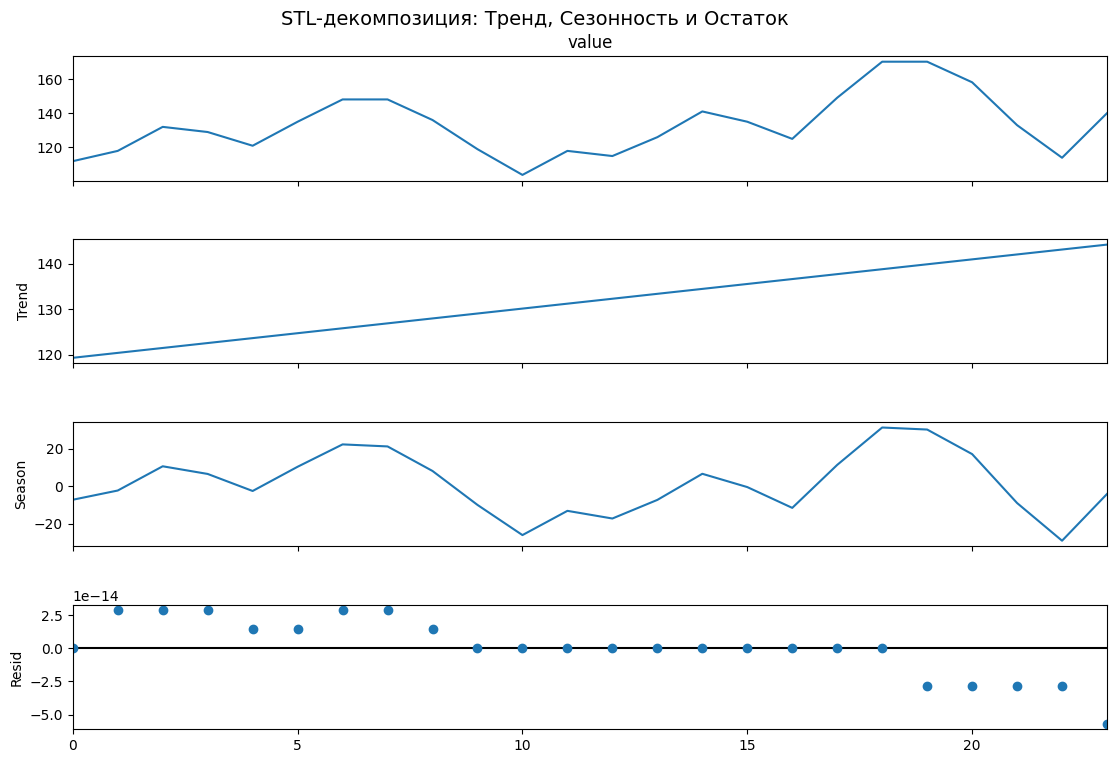

In [2]:
#1. Загрузка исходного временного ряда
df = pd.read_csv(data_path)
series = df.iloc[:, 0]  # берем первую колонку
series.index = pd.RangeIndex(start=0, stop=len(series), step=1)  # на всякий случай

# Визуализация исходного ряда
plt.figure(figsize=(12, 5))
plt.plot(series, label='Исходный ряд')
plt.title('Временной ряд — полные данные')
plt.legend()
plt.grid(True)
plt.show()

# 2. STL-декомпозиция (тренд и сезонность)
stl = STL(series, period=12)
result = stl.fit()

# Отрисовка компонентов
fig = result.plot()
fig.set_size_inches(12, 8)
plt.suptitle("STL-декомпозиция: Тренд, Сезонность и Остаток", fontsize=14)
plt.show()



Прогнозы от моделей: ['arima', 'holt', 'prophet', 'tbats', 'ensemble']


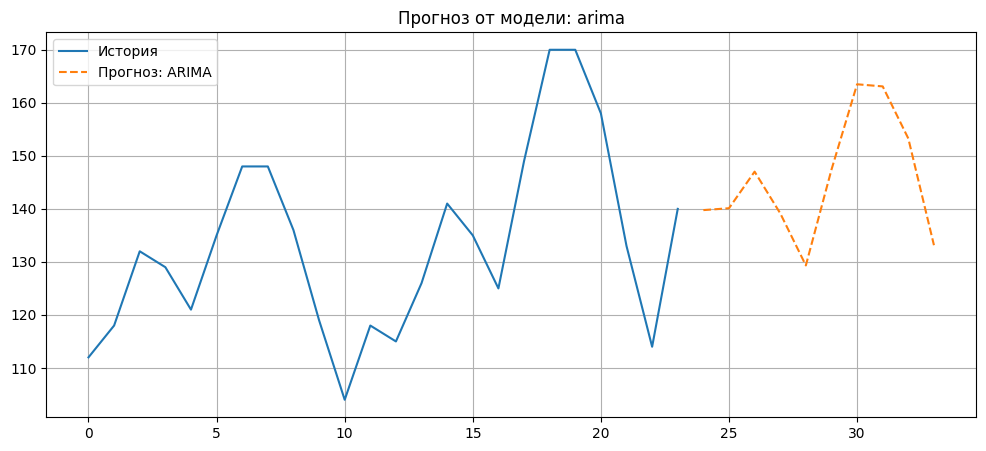

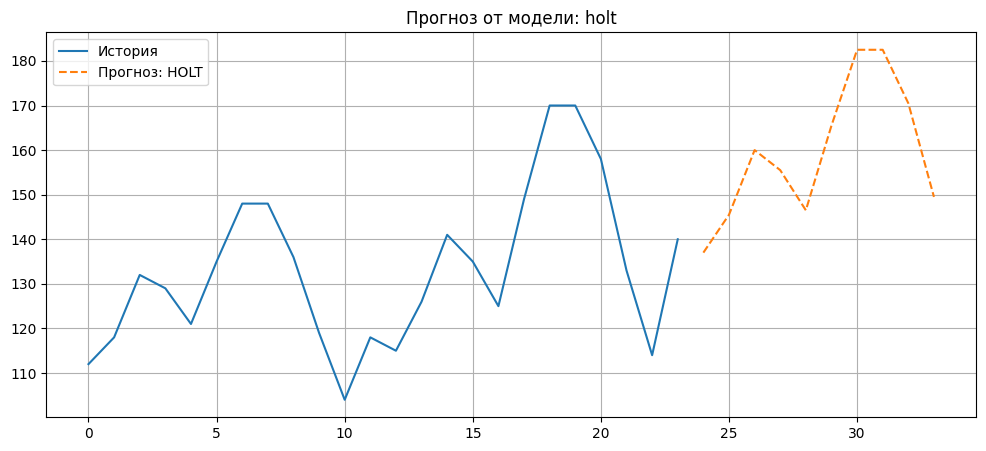

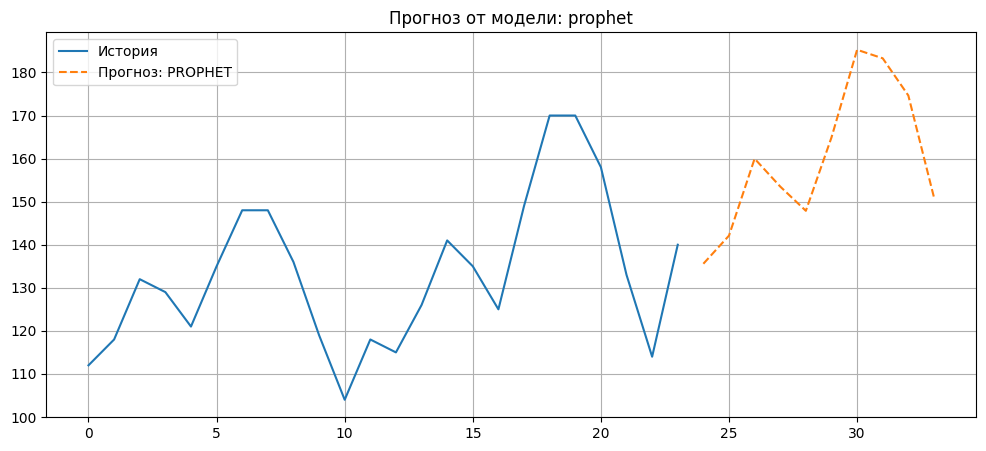

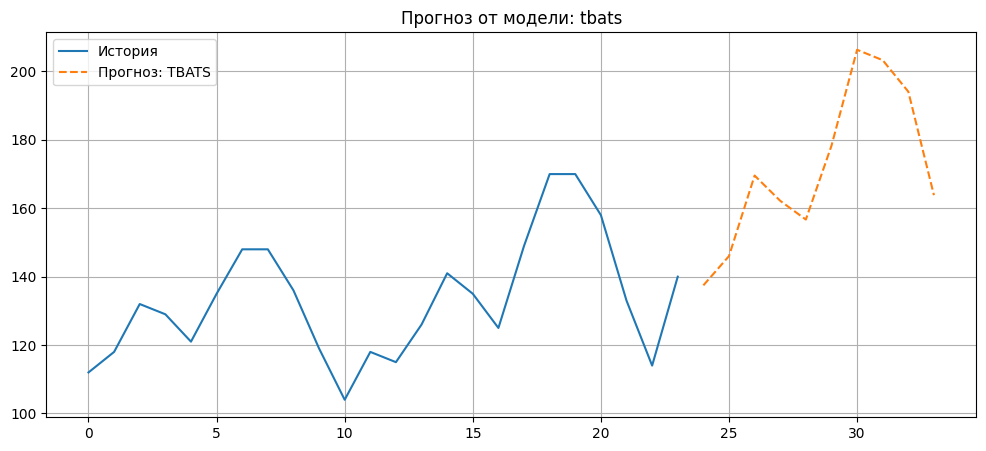

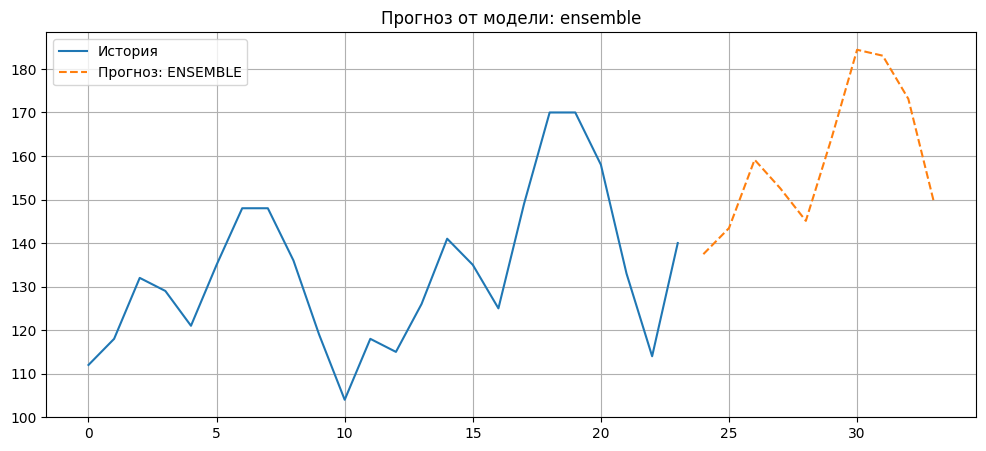

In [3]:
# 3. Загрузка прогноза
forecast_df = pd.read_csv(forecast_path)

# Убедимся, что названия колонок корректны
print("Прогнозы от моделей:", list(forecast_df.columns))

# 4. Визуализация прогноза от каждой модели
# Настройки:
horizon = len(forecast_df)
n_context = 50  # сколько последних точек показывать из исходного ряда

context = series[-n_context:]

# Построим график для каждой модели
for model_name in forecast_df.columns:
    forecast = forecast_df[model_name]

    plt.figure(figsize=(12, 5))
    plt.plot(context.index, context.values, label='История')
    plt.plot(range(context.index[-1]+1, context.index[-1]+1 + horizon),
             forecast, label=f'Прогноз: {model_name.upper()}', linestyle='--')
    plt.title(f"Прогноз от модели: {model_name}")
    plt.legend()
    plt.grid(True)
    plt.show()
